#**Checkpoint 3**

Kali ini  kita akan meneruskan pengembangan dari dataset  [Kaggle-warehouse and retail sales](https://www.kaggle.com/datasets/samithsachidanandan/warehouse-and-retail-sales)"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Warehouse_and_Retail_Sales.csv")

In [3]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.0,1.00
307641,2020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.0,3586.88
307642,2020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.0,4.00
307643,2020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.0,2.00


#**1. Visualisasi Data yang Relevan dengan Business Understanding**

Tujuan studi kasus dalam menganalisis pola penjualan maupun penyewaan pada Gudang

#**Distribusi penjualan sewaan**

In [19]:
df['RETAIL TRANSFERS'] = pd.to_numeric(df['RETAIL TRANSFERS'], errors='coerce')

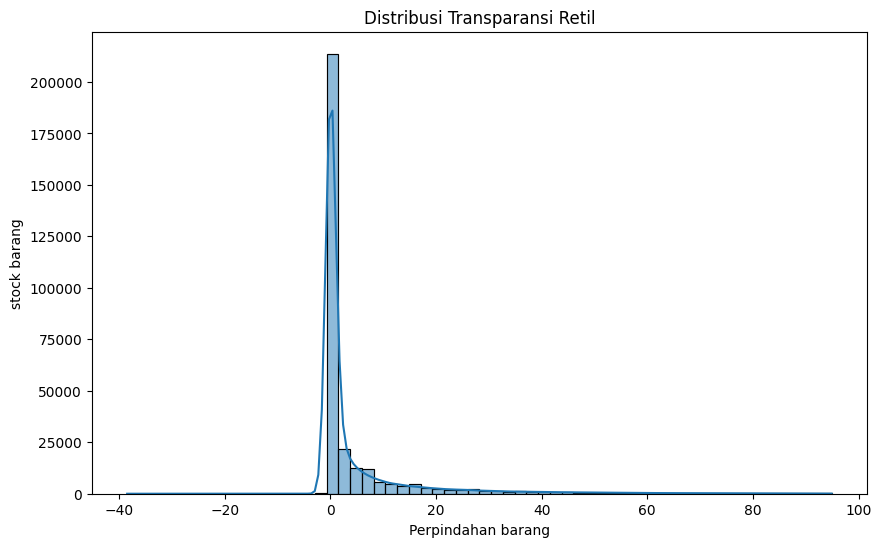

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['RETAIL TRANSFERS'] < 95]['RETAIL TRANSFERS'], bins=60, kde=True)
plt.title('Distribusi Transparansi Retil')
plt.xlabel('Perpindahan barang')
plt.ylabel('stock barang')
plt.show()



#**Jumlah produk per supplier**

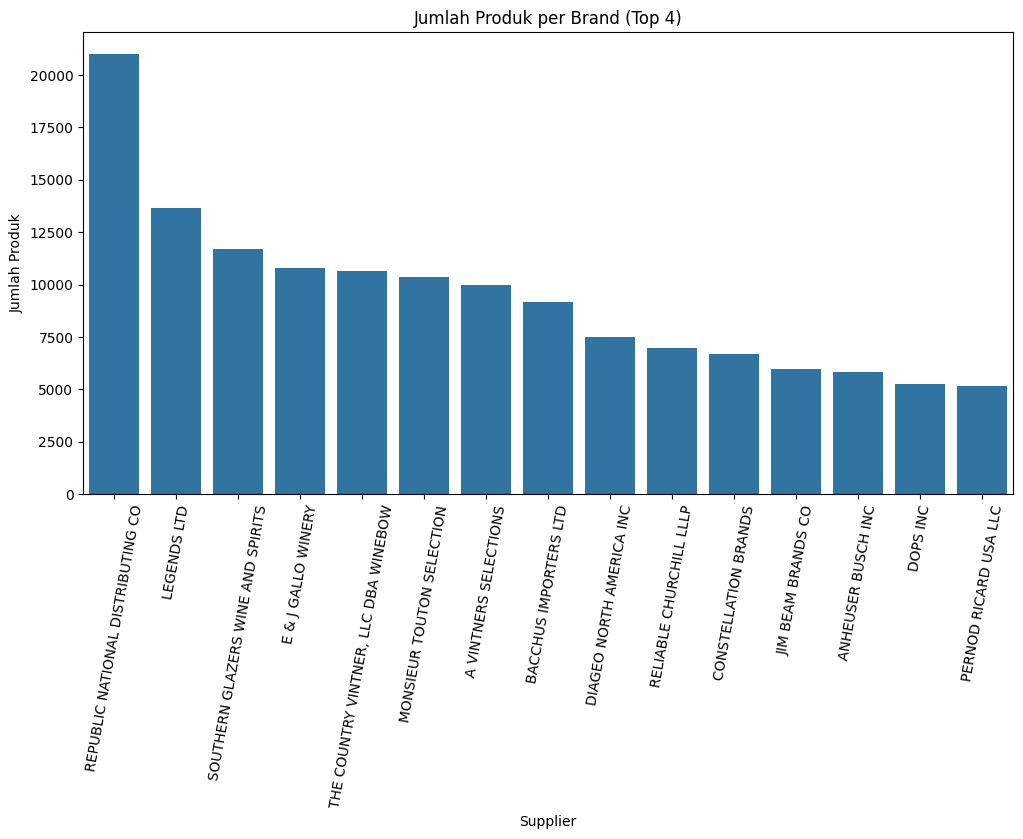

In [97]:


top_suppliers = df['SUPPLIER'].value_counts().head(15).index  # Ambil hanya nama supplier
plt.figure(figsize=(12,6))

sns.countplot(data=df[df['SUPPLIER'].isin(top_suppliers)], x='SUPPLIER', order=top_suppliers)

plt.title('Jumlah Produk per Brand (Top 15)')  # Sesuaikan dengan jumlah yang ditampilkan
plt.xticks(rotation=80)
plt.ylabel('Jumlah Produk')
plt.xlabel('Supplier')
plt.show()


#**Box plot TIPE BARANG**

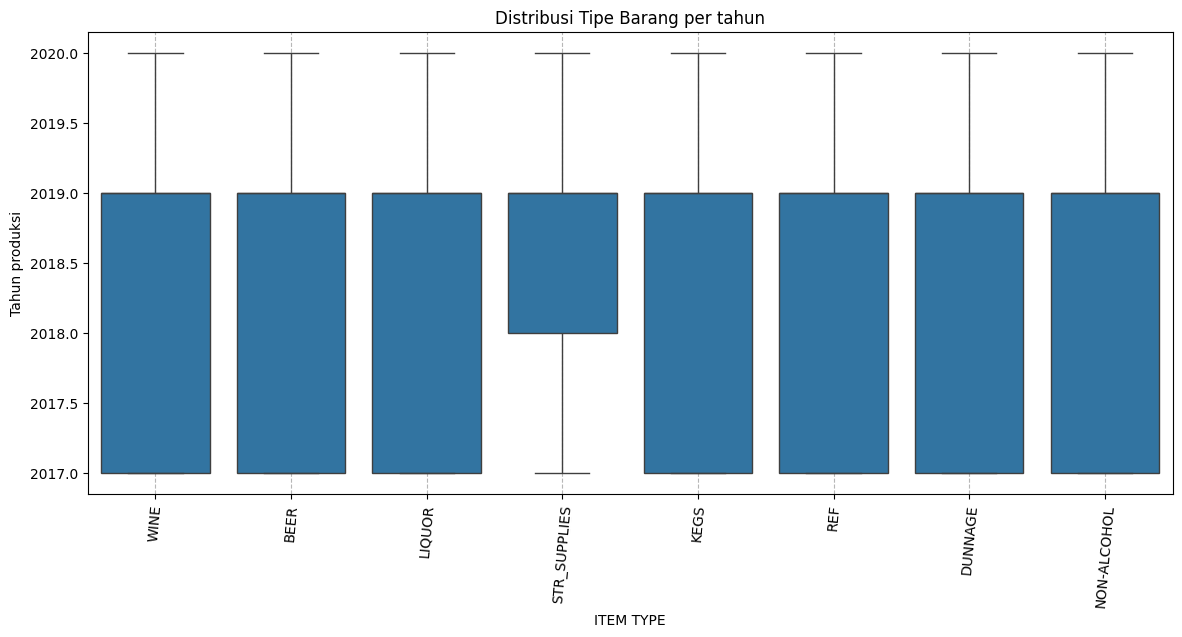

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into the 'df' DataFrame.
# Replace 'your_data.csv' with the actual path to your data file.
df = pd.read_csv("/content/Warehouse_and_Retail_Sales.csv")

# Pastikan top_item benar
top_item = df['ITEM TYPE'].value_counts().head(15).index

plt.figure(figsize=(14, 6))


sns.boxplot(data=df[df['ITEM TYPE'].isin(top_item)], x='ITEM TYPE', y='YEAR')


plt.title('Distribusi Tipe Barang per tahun')
plt.xticks(rotation=85)
plt.ylabel('Tahun produksi')


plt.grid(axis='x', linestyle='--', alpha=0.9)

plt.show()

#**Jumlah barang yang dilabeli berdasarkan penjualan retail**

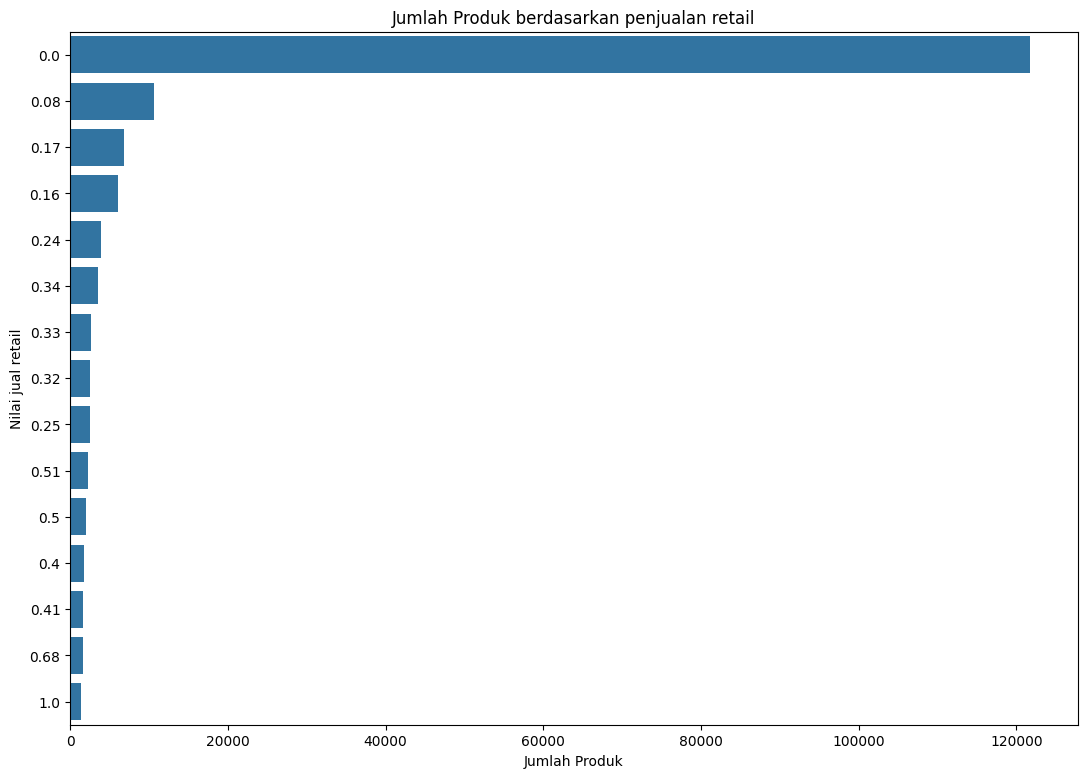

In [21]:
top_res = df['RETAIL SALES'].value_counts().nlargest(15).index
plt.figure(figsize=(13,9))
sns.countplot(data=df[df['RETAIL SALES'].isin(top_res)], y='RETAIL SALES', order=top_res)
plt.title('Jumlah Produk berdasarkan penjualan retail')
plt.xlabel('Jumlah Produk')
plt.ylabel('Nilai jual retail')
plt.show()

#**membandingkan penjualan retail dengan penjualan gudang**

In [19]:
df['RETAIL SALES'] = pd.to_numeric(df['RETAIL SALES'], errors='coerce')
df = df.dropna(subset=['RETAIL SALES'])

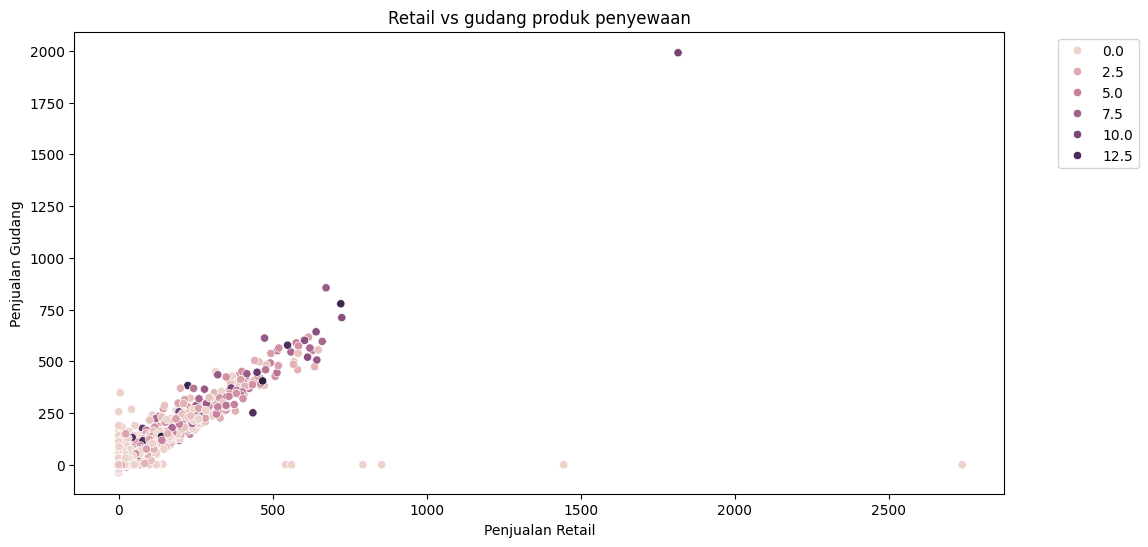

In [26]:
# Assuming you want to filter by the top 15 warehouse sales, similar to how top_res was defined
top_sale = df['WAREHOUSE SALES'].value_counts().nlargest(15).index

plt.figure(figsize=(12,6))
sns.scatterplot(data=df[df['WAREHOUSE SALES'].isin(top_sale)], x='RETAIL SALES', y='RETAIL TRANSFERS', hue='WAREHOUSE SALES')
plt.title('Retail vs gudang produk penyewaan')
plt.xlabel('Penjualan Retail')
plt.ylabel('Penjualan Gudang')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#**2. insight dan tindakan yang dapat diambil berdasarkan hasil visualisasi yang dibuat**

1.Distribusi Penjualaan sewaan

Sebagian besar stok produk berada di bawah 25000 suplai menandakan gudang cukup jarang untuk dijadikan tempat penyimpanan yang lama.
Perusahaan bisa mengarahkan strategi bundling dan strategi khusus untuk menarik supplier di segmen keamanan barang ini.

2.Jumlah Produk per Supplier
Supplier dengan jumlah produk terbanyak menunjukkan dominasi pasar.
Fokus pergudangan dapat diarahkan pada brand yang paling aktif atau paling banyak menjual produk supplier lebih banyak.

3.Boxplot Tipe Barang per Tahun
Hampir seluruh Tipe Barang memiliki jumlah median yang jauh lebih stabil dibandingkan lainnya, menunjukkan positioning produk premium dan terjaga.
Variasi harga yang lebar menunjukkan adanya segmen pasar yang beragam.
Tipe barang dengan harga lebih rendah bisa digunakan untuk strategi promosi entry-level dan dapat terus stabil ke tahun mendatang.

4.Jumlah barang dilabeli berdasarkan penjualan retail
Meskipun kebanyakan barang terlabel dengan 0,0 itu bukan berarti barang ini tidak berpemilikan tetap Barang ini terdapat didalam Gudang penyimpanan

5.Perbandingan penjualan retail vs Gudang
Tidak semua produk gudang dapat melampaui produk retail.
Beberapa barang penjualan gudang dengan harga menengah memiliki hasil yang lebih baik, artinya kualitas dan kepuasan tidak selalu berbanding lurus dengan harga.
Evaluasi kualitas produk bisa ditingkatkan untuk memperkuat loyalitas supplier